In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

## 2. Data Loading

In [2]:
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


## 3 FE : 시계열 패턴 추출

In [3]:
raw_all.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,17379,17379,2011-01-01 0:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,379.00",NaN,NaN,NaN,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,379.00",NaN,NaN,NaN,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,379.00",NaN,NaN,NaN,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,379.00",NaN,NaN,NaN,1.43,0.64,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...
humidity,"17,379.00",NaN,NaN,NaN,62.72,19.29,0.00,48.00,63.00,78.00,100.00
windspeed,"17,379.00",NaN,NaN,NaN,12.74,8.20,0.00,7.00,13.00,17.00,57.00
casual,"17,379.00",NaN,NaN,NaN,35.68,49.31,0.00,4.00,17.00,48.00,367.00
registered,"17,379.00",NaN,NaN,NaN,153.79,151.36,0.00,34.00,115.00,220.00,886.00


In [4]:
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.6+ MB


In [5]:
print(raw_all.shape)
print(raw_all.ndim)
display(raw_all.head())
display(raw_all.tail())
display(raw_all.describe(include = 'all').T)
display(raw_all.info())

(17379, 12)
2


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61
17378,2012-12-31 23:00,1,0,1,1,10.66,13.63,65,9.00,12,37,49


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,17379,17379,2011-01-01 0:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,379.00",NaN,NaN,NaN,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,379.00",NaN,NaN,NaN,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,379.00",NaN,NaN,NaN,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,379.00",NaN,NaN,NaN,1.43,0.64,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...
humidity,"17,379.00",NaN,NaN,NaN,62.72,19.29,0.00,48.00,63.00,78.00,100.00
windspeed,"17,379.00",NaN,NaN,NaN,12.74,8.20,0.00,7.00,13.00,17.00,57.00
casual,"17,379.00",NaN,NaN,NaN,35.68,49.31,0.00,4.00,17.00,48.00,367.00
registered,"17,379.00",NaN,NaN,NaN,153.79,151.36,0.00,34.00,115.00,220.00,886.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.6+ MB


None

In [6]:
# set datetime to datetime type
if 'datetime' in raw_all.columns:
    raw_all['datetime'] = pd.to_datetime(raw_all['datetime'])
    raw_all['Datetime'] = pd.to_datetime(raw_all['datetime'])
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  count       17379 non-null  int64         
 12  Datetime    17379 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(8)
memory usage: 1.7 MB


In [7]:
raw_all.index

RangeIndex(start=0, stop=17379, step=1)

In [8]:
raw_all.index.dtype

dtype('int64')

In [9]:
# set index as datetime column
if raw_all.index.dtype == 'int64':
    raw_all.set_index('Datetime',inplace = True)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90


In [10]:
# dataform
display(raw_all.describe(include = 'all').T)
display(raw_all.isnull())
display(raw_all.isnull().sum())

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17379,17379,2011-01-01,1,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,379.00",NaN,NaT,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,379.00",NaN,NaT,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,379.00",NaN,NaT,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,379.00",NaN,NaT,NaN,NaT,NaT,1.43,0.64,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
humidity,"17,379.00",NaN,NaT,NaN,NaT,NaT,62.72,19.29,0.00,48.00,63.00,78.00,100.00
windspeed,"17,379.00",NaN,NaT,NaN,NaT,NaT,12.74,8.20,0.00,7.00,13.00,17.00,57.00
casual,"17,379.00",NaN,NaT,NaN,NaT,NaT,35.68,49.31,0.00,4.00,17.00,48.00,367.00
registered,"17,379.00",NaN,NaT,NaN,NaT,NaT,153.79,151.36,0.00,34.00,115.00,220.00,886.00


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 01:00:00,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 02:00:00,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 03:00:00,False,False,False,False,False,False,False,False,False,False,False,False
2011-01-01 04:00:00,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,False,False,False,False,False,False,False,False,False,False,False,False
2012-12-31 20:00:00,False,False,False,False,False,False,False,False,False,False,False,False
2012-12-31 21:00:00,False,False,False,False,False,False,False,False,False,False,False,False


datetime      0
season        0
holiday       0
workingday    0
weather       0
             ..
humidity      0
windspeed     0
casual        0
registered    0
count         0
Length: 12, dtype: int64

In [11]:
raw_all.index
# freq : 컴퓨터가 이 데이터의 빈도를 파악 불가. 추정을 못함.

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17379, freq=None)

In [12]:
raw_all.asfreq('H').index # asfreq 명령어로 freq 특징을 입력.

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17544, freq='H')

In [13]:
raw_all.asfreq('H').head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,8.00,32.00,40.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,5.00,27.00,32.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,3.00,10.00,13.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,0.00,1.00,1.00
2011-01-01 05:00:00,2011-01-01 05:00:00,1.00,0.00,0.00,2.00,9.84,12.88,75.00,6.00,0.00,1.00,1.00
2011-01-01 06:00:00,2011-01-01 06:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,2.00,0.00,2.00
2011-01-01 07:00:00,2011-01-01 07:00:00,1.00,0.00,0.00,1.00,8.20,12.88,86.00,0.00,1.00,2.00,3.00
2011-01-01 08:00:00,2011-01-01 08:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,1.00,7.00,8.00


##### 예제. 문자열, datetime type 변환

In [14]:
test = raw_all.index[1]

In [15]:
test_1 = test.strftime("%Y %m %d") # datetime 을 문자열로

In [16]:
test_1

'2011 01 01'

In [17]:
from datetime import datetime

In [18]:
datetime.strptime(test_1,"%Y %m %d") # 문자열을 datetime으로.

datetime.datetime(2011, 1, 1, 0, 0)

##### 이어서

In [19]:
raw_all.isnull().sum() # 전부 0임. 빈칸 없음.

datetime      0
season        0
holiday       0
workingday    0
weather       0
             ..
humidity      0
windspeed     0
casual        0
registered    0
count         0
Length: 12, dtype: int64

freq를 통해 데이터가 빠져있는 시간(구간)을 파악 가능

In [20]:
raw_all.asfreq('H').isnull().sum() # Hour기준으로 데이터가 빠져있는 구간 체크.

datetime      165
season        165
holiday       165
workingday    165
weather       165
             ... 
humidity      165
windspeed     165
casual        165
registered    165
count         165
Length: 12, dtype: int64

In [21]:
# 시간대 별로 빈 값이 있는 지 확인하기 위해 axis = 1로 실행.
raw_all.asfreq('H')[raw_all.asfreq('H').isnull().sum(axis =1) > 0] # 165개 빈 값이 존재.
# -> 빠져있는 raw가 무엇인지 체크

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-02 05:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 02:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-30 12:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-08 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-29 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
display('index',raw_all.index)
print()
display('D',raw_all.asfreq('D'))
print()
display('H',raw_all.asfreq('H'))
print()

'index'

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17379, freq=None)

'D'

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01,2011-01-01,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,16.00
2011-01-02,2011-01-02,1.00,0.00,0.00,2.00,18.86,22.73,88.00,20.00,4.00,13.00,17.00
2011-01-03,2011-01-03,1.00,0.00,1.00,1.00,9.02,9.85,44.00,24.00,0.00,5.00,5.00
2011-01-04,2011-01-04,1.00,0.00,1.00,1.00,6.56,9.09,55.00,7.00,0.00,5.00,5.00
2011-01-05,2011-01-05,1.00,0.00,1.00,1.00,8.20,12.88,64.00,0.00,0.00,6.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1.00,0.00,1.00,3.00,10.66,11.37,87.00,20.00,0.00,3.00,3.00
2012-12-28,2012-12-28,1.00,0.00,1.00,2.00,9.84,12.12,60.00,11.00,3.00,22.00,25.00
2012-12-29,2012-12-29,1.00,0.00,0.00,2.00,9.84,12.12,70.00,0.00,1.00,25.00,26.00


'H'

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,8.00,32.00,40.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,5.00,27.00,32.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,3.00,10.00,13.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1.00,0.00,1.00,2.00,10.66,12.88,60.00,11.00,11.00,108.00,119.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1.00,0.00,1.00,2.00,10.66,12.88,60.00,11.00,8.00,81.00,89.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1.00,0.00,1.00,1.00,10.66,12.88,60.00,11.00,7.00,83.00,90.00


In [23]:
raw_all.asfreq('H').head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,8.00,32.00,40.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,5.00,27.00,32.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,3.00,10.00,13.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-04 23:00:00,2011-01-04 23:00:00,1.00,0.00,1.00,1.00,8.20,11.37,69.00,6.00,2.00,9.00,11.00
2011-01-05 00:00:00,2011-01-05 00:00:00,1.00,0.00,1.00,1.00,8.20,12.88,64.00,0.00,0.00,6.00,6.00
2011-01-05 01:00:00,2011-01-05 01:00:00,1.00,0.00,1.00,1.00,6.56,9.85,74.00,6.00,0.00,6.00,6.00


In [24]:
# setting frequency of time series data
raw_all = raw_all.asfreq('H',method = 'ffill') # 데이터 아래방향으로 채우기 : forward, / 위의 방향으로 채우기 : nackward
# forward : 바로 위의 데이터를 가지고 밑의 NAN을 채운다.
raw_all.isnull().sum()
raw_all.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17544, freq='H')

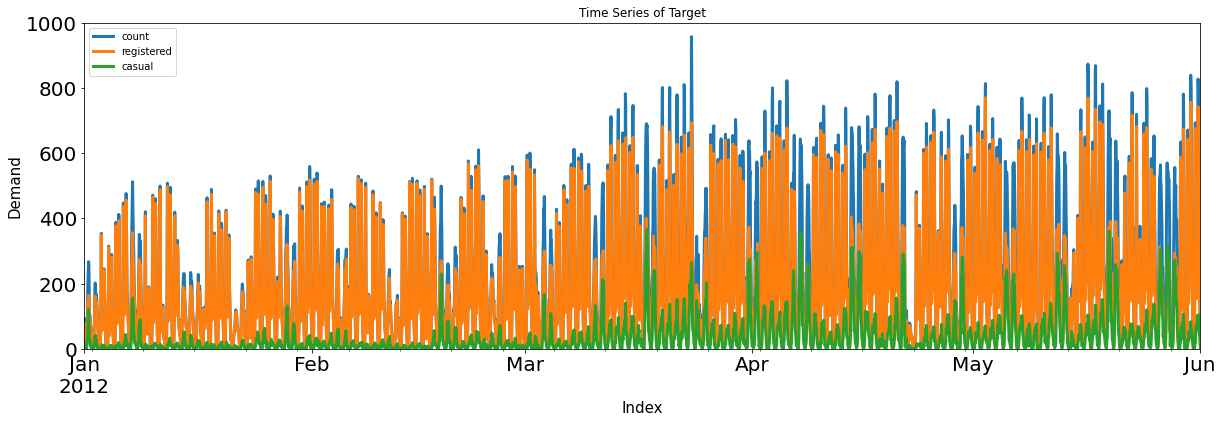

In [25]:
raw_all[['count','registered','casual']].plot(kind = 'line',figsize = (20,6),linewidth = 3, fontsize = 20,
                                             xlim = ('2012-01-01','2012-06-01'), ylim = (0,1000))
plt.title('Time Series of Target')
plt.xlabel('Index',fontsize = 15)
plt.ylabel('Demand', fontsize = 15)
plt.show()

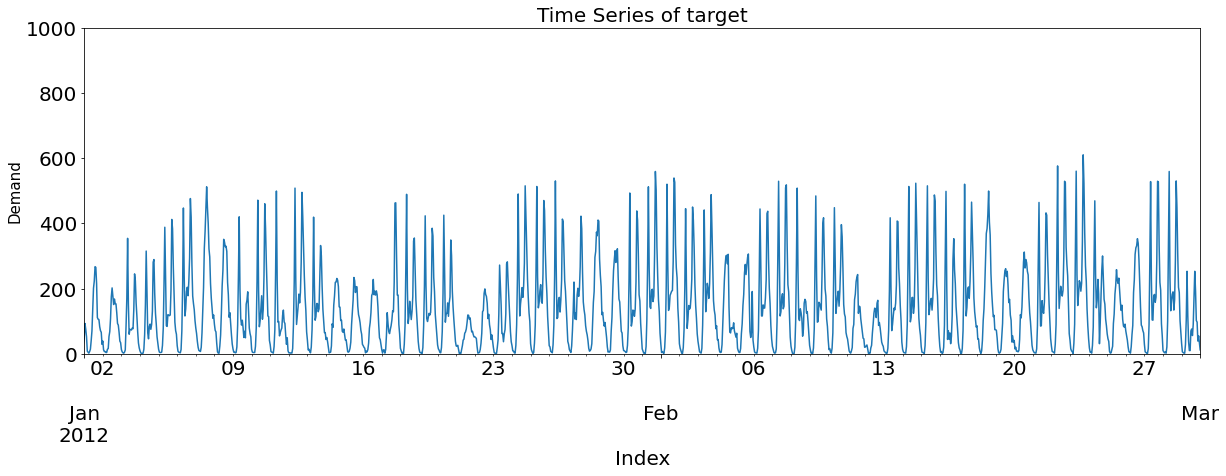

In [26]:
# Line plot of y
raw_all['count'].plot(kind = 'line', figsize = (20,6), fontsize = 20, 
                     xlim = ('2012-01-01','2012-03-01'), ylim = (0,1000))
plt.title('Time Series of target', fontsize = 20)
plt.xlabel('Index',fontsize = 20)
plt.ylabel('Demand',fontsize = 15)
plt.show()

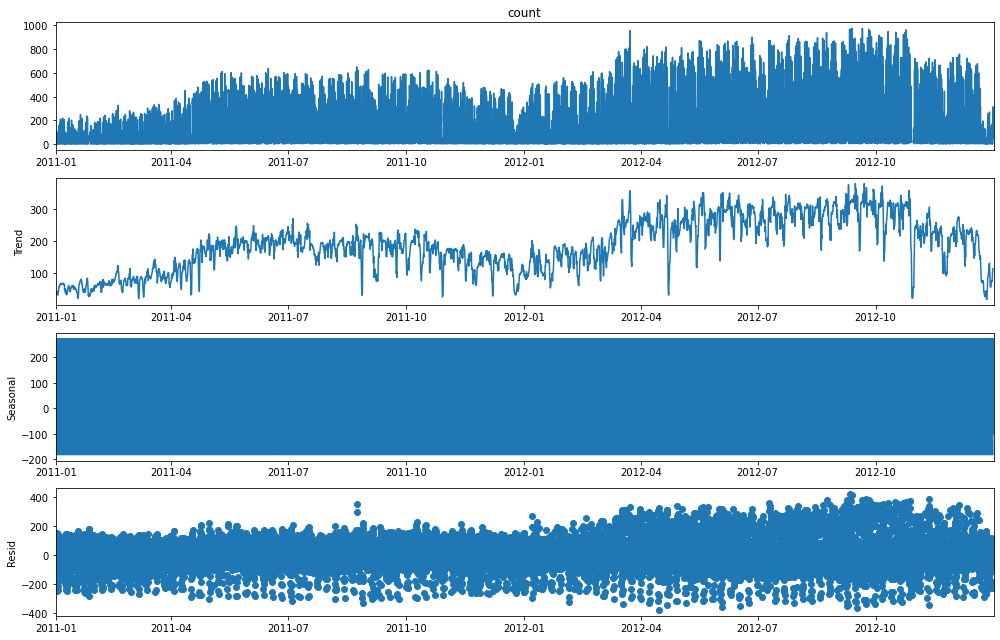

In [27]:
# 데이터를 시게열 분해을 함. -> trend + seasonal + residual
plt.rcParams['figure.figsize'] = (14,9)
sm.tsa.seasonal_decompose(raw_all['count'], model = 'additive').plot()
plt.show()

count라는 값은 0에서 1000사이의 값을 가짐.

trend : 1000의 수요중에서 약 300정도의 수요를 가져감. 데이터 추세를 보여줌 (moving average형식으로 추세를 찾음) <br>
seasonal : 약 250정도로 굉장히 빈번하게 계절성이 발생. <br>
residuel : 위 2가지를 뺀 나머지를 잔차


In [28]:
result = sm.tsa.seasonal_decompose(raw_all['count'], model = 'additive')
pd.DataFrame(result.observed - result.trend - result.seasonal).describe() # 잔차의 통계적 특성 확인.

,0
count,"17,520.00"
mean,-0.01
std,99.68
min,-377.73
25%,-61.00
50%,-6.01
75%,54.86
max,418.44


trend는 moving avaerage 방식으로 앞 12개의 값을 추세를 확인하기 위해 사용. 뒤에도 마찬가지.<br>
그래서 앞 뒤에 nan으로 표현되는 것일뿐. 해당 일자의 실제 데이터가 NAN이 아니라는 이야기

In [29]:
result.trend[:20]

Datetime
2011-01-01 00:00:00     NaN
2011-01-01 01:00:00     NaN
2011-01-01 02:00:00     NaN
2011-01-01 03:00:00     NaN
2011-01-01 04:00:00     NaN
                       ... 
2011-01-01 15:00:00   39.02
2011-01-01 16:00:00   38.92
2011-01-01 17:00:00   39.00
2011-01-01 18:00:00   39.04
2011-01-01 19:00:00   39.00
Freq: H, Name: trend, Length: 20, dtype: float64

In [30]:
display((result.observed - result.trend - result.seasonal == result.resid).sum())
# nan때문에 오차가 있을 뿐. 거의 같다

17520

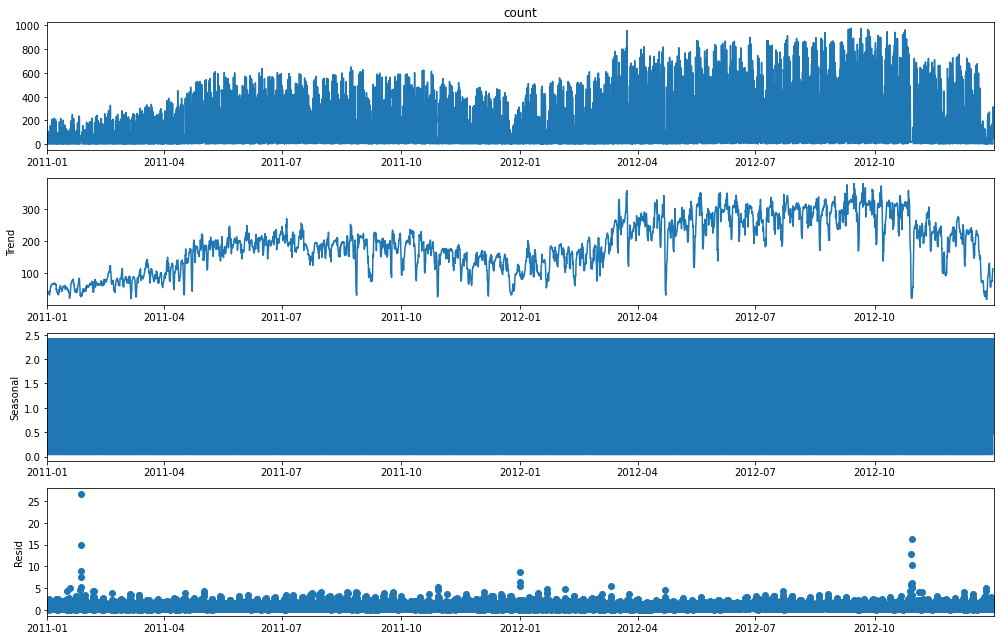

In [31]:
# 시계열을 분해. 곱셉으로 분해함. trend * seasonal *residual
sm.tsa.seasonal_decompose(raw_all['count'], model = 'multiplicative').plot()
plt.show()

2가지 시계열 분해 중 도메인 특징에 따라 결정. 지금은 additive로 감

#####  실제 데이터 반영

In [32]:
result = sm.tsa.seasonal_decompose(raw_all['count'],model = 'additive')

# trend 데이터 활용.
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True) # 맨 마지막에 있는 Nan을 채우기 위해서!
Y_trend.fillna(method='bfill', inplace=True) # 맨 앞에 있는 Nan을 채우기 위해서!
Y_trend.columns = ['count_trend']

# Seasonal 데이터 활용
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True)
Y_seasonal.fillna(method='bfill', inplace=True)
Y_seasonal.columns = ['count_seasonal']

In [33]:
Y_seasonal

,count_seasonal
Datetime,
2011-01-01 00:00:00,-134.25
2011-01-01 01:00:00,-154.75
2011-01-01 02:00:00,-165.27
2011-01-01 03:00:00,-176.48
2011-01-01 04:00:00,-181.67
...,...
2012-12-31 19:00:00,122.70
2012-12-31 20:00:00,37.48
2012-12-31 21:00:00,-16.10


In [34]:
# 데이터 결합

pd.concat([raw_all,Y_trend, Y_seasonal],axis = 1).isnull().sum() # null 값 여부 확인. 특별하게 생기지 않음

if 'count_trend' not in raw_all.columns:
    if 'count_seasonal' not in raw_all.columns:
        raw_all = pd.concat([raw_all,Y_trend,Y_seasonal],axis = 1)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal
Datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10


<AxesSubplot:xlabel='Datetime'>

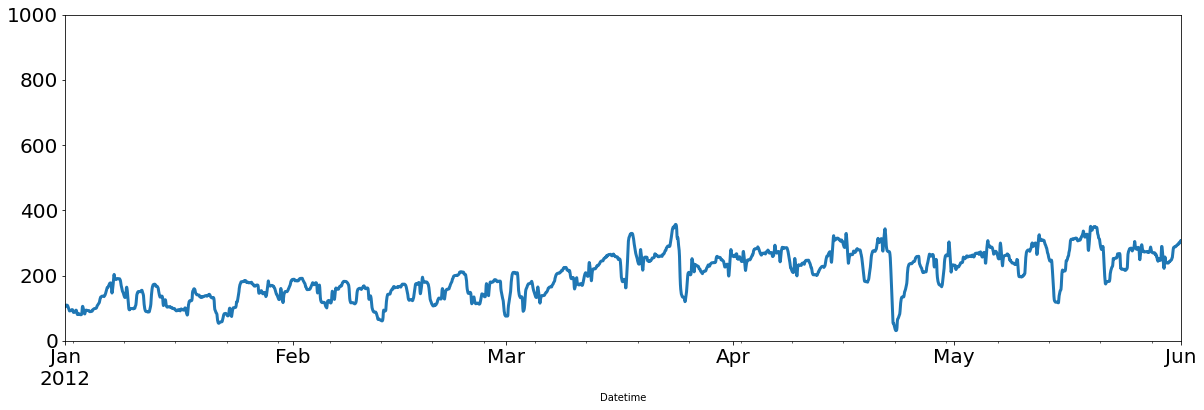

In [35]:
# plot of moving average values using rolling funnction

raw_all['count'].rolling(24).mean().plot(kind = 'line',figsize = (20,6), linewidth = 3, fontsize = 20,
                                        xlim = ('2012-01-01','2012-06-01'), ylim = (0,1000))


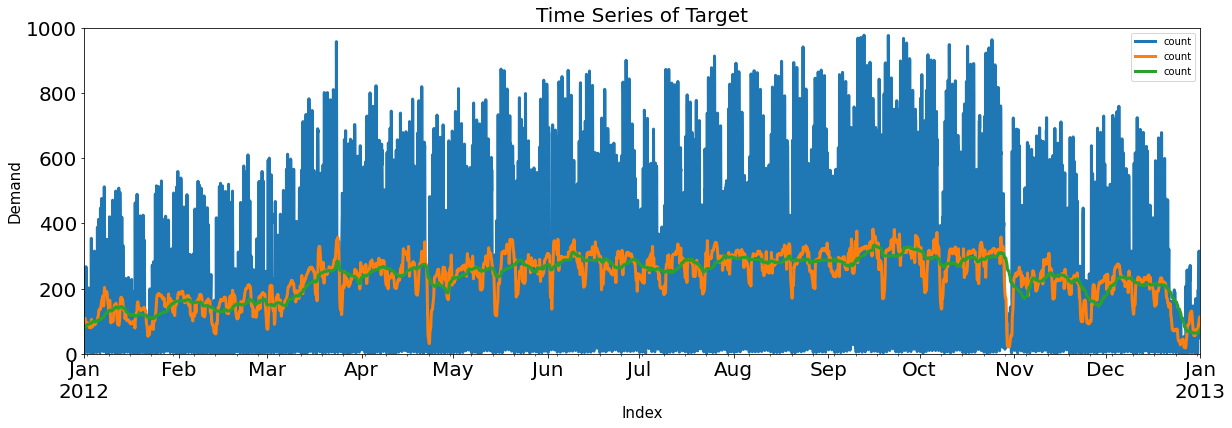

In [36]:
# comparison of several moving average values
pd.concat([raw_all[['count']],
           raw_all[['count']].rolling(24).mean(), # Daily pattern 확인하겠다!
           raw_all[['count']].rolling(24*7).mean()], axis=1).plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                                                  xlim=('2012-01-01', '2013-01-01'), ylim=(0,1000))
            # 7일간의 pattern을 보겠다!
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()


In [37]:
# fill nan as some values and merging
Y_count_Day = raw_all[['count']].rolling(24).mean()
Y_count_Day.fillna(method='ffill', inplace=True) # rolling window를 하면서 앞뒤로 값을 추가하기 때문에 값을 추정할수 없는 값들이 생김.
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns = ['count_Day']
Y_count_Week = raw_all[['count']].rolling(24*7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']
if 'count_Day' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_count_Day], axis=1)
if 'count_Week' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_count_Week], axis=1)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week
Datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10


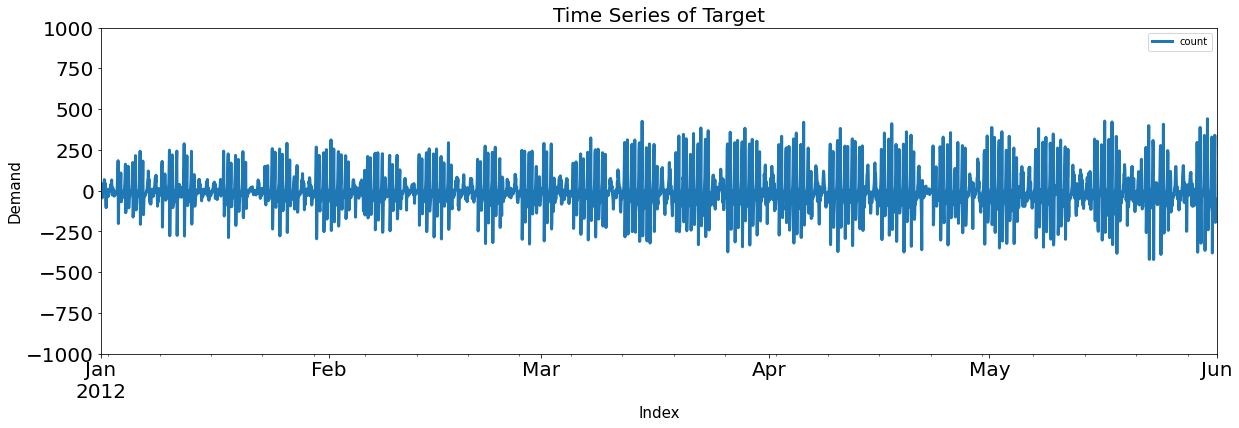

In [38]:
# line plot of Y for specific periods
raw_all[['count']].diff().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                 xlim=('2012-01-01', '2012-06-01'), ylim=(-1000,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [39]:
# diff of Y and merging
Y_diff = raw_all[['count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']
if 'count_diff' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_diff], axis=1)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff
Datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00


### Temp 를 건드려볼 것

In [40]:
raw_all['temp']

Datetime
2011-01-01 00:00:00    9.84
2011-01-01 01:00:00    9.02
2011-01-01 02:00:00    9.02
2011-01-01 03:00:00    9.84
2011-01-01 04:00:00    9.84
                       ... 
2012-12-31 19:00:00   10.66
2012-12-31 20:00:00   10.66
2012-12-31 21:00:00   10.66
2012-12-31 22:00:00   10.66
2012-12-31 23:00:00   10.66
Freq: H, Name: temp, Length: 17544, dtype: float64

In [41]:
raw_all['temp_group'] = pd.cut(raw_all['temp'],10)

In [42]:
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group
Datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]"
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]"
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]"
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]"
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00,"(8.856, 12.874]"
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00,"(8.856, 12.874]"
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00,"(8.856, 12.874]"


In [43]:
raw_all.dtypes # tenmp_group이 category로 되어있음.

datetime          datetime64[ns]
season                     int64
holiday                    int64
workingday                 int64
weather                    int64
                       ...      
count_seasonal           float64
count_Day                float64
count_Week               float64
count_diff               float64
temp_group              category
Length: 18, dtype: object

In [44]:
raw_all.describe().T
raw_all.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29 00:00:00,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaN,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaN,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
count_seasonal,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.00,128.50,-181.67,-117.81,21.32,64.69,273.37
count_Day,"17,544.00",NaN,NaN,NaN,NaT,NaT,187.74,80.25,18.04,130.29,188.48,247.42,382.50
count_Week,"17,544.00",NaN,NaN,NaN,NaT,NaT,187.67,73.12,45.95,137.19,185.83,254.88,332.99
count_diff,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.00,100.90,-523.00,-39.00,-4.00,30.00,519.00


In [45]:
raw_all.isnull().sum()

datetime          0
season            0
holiday           0
workingday        0
weather           0
                 ..
count_seasonal    0
count_Day         0
count_Week        0
count_diff        0
temp_group        0
Length: 18, dtype: int64

##### 시간정보를 추출할 것임

In [46]:
display(raw_all.datetime.dt.year) # dt function활용 가능. -> year 출력

Datetime
2011-01-01 00:00:00    2011
2011-01-01 01:00:00    2011
2011-01-01 02:00:00    2011
2011-01-01 03:00:00    2011
2011-01-01 04:00:00    2011
                       ... 
2012-12-31 19:00:00    2012
2012-12-31 20:00:00    2012
2012-12-31 21:00:00    2012
2012-12-31 22:00:00    2012
2012-12-31 23:00:00    2012
Freq: H, Name: datetime, Length: 17544, dtype: int64

In [47]:
raw_all['Year'] = raw_all.datetime.dt.year
raw_all['Quater'] = raw_all.datetime.dt.quarter # 분기 표시

In [48]:
raw_all.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,Year,Quater
count,"17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00"
mean,2.50,0.03,0.68,1.43,20.30,23.71,62.87,12.81,35.35,152.44,187.80,187.79,0.00,187.74,187.67,0.00,"2,011.50",2.51
std,1.11,0.17,0.47,0.65,7.92,8.62,19.34,8.29,49.19,151.28,181.35,80.16,128.50,80.25,73.12,100.90,0.50,1.12
min,1.00,0.00,0.00,1.00,0.82,0.00,0.00,0.00,0.00,0.00,1.00,18.06,-181.67,18.04,45.95,-523.00,"2,011.00",1.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,48.00,7.00,4.00,32.00,38.00,130.56,-117.81,130.29,137.19,-39.00,"2,011.00",2.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,63.00,13.00,16.00,114.00,140.00,188.47,21.32,188.48,185.83,-4.00,"2,012.00",3.00
75%,3.00,0.00,1.00,2.00,27.06,31.06,79.00,17.00,48.00,219.00,279.00,247.46,64.69,247.42,254.88,30.00,"2,012.00",4.00
max,4.00,1.00,1.00,4.00,41.00,50.00,100.00,57.00,367.00,886.00,977.00,379.06,273.37,382.50,332.99,519.00,"2,012.00",4.00


In [49]:
raw_all['Quater_ver2'] = raw_all['Quater'] + (raw_all.Year - raw_all.Year.min()) * 4 # 해마다 다른 분기를 표현하기 위한 식.
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]",2011,1,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]",2011,1,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]",2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,119,113.71,122.70,110.17,73.30,-3.00,"(8.856, 12.874]",2012,4,8
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,89,113.71,37.48,110.88,73.70,-30.00,"(8.856, 12.874]",2012,4,8
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,90,113.71,-16.10,112.67,74.10,1.00,"(8.856, 12.874]",2012,4,8


In [50]:
raw_all['Month'] = raw_all.datetime.dt.month
raw_all['Day'] = raw_all.datetime.dt.day
raw_all['Hour'] = raw_all.datetime.dt.hour
raw_all['DayofWeek'] = raw_all.datetime.dt.dayofweek # Monday=0, Sunday=6.
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,56.11,24.00,"(8.856, 12.874]",2011,1,1,1,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,56.11,24.00,"(8.856, 12.874]",2011,1,1,1,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,56.11,-8.00,"(8.856, 12.874]",2011,1,1,1,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,56.11,-19.00,"(8.856, 12.874]",2011,1,1,1,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,56.11,-12.00,"(8.856, 12.874]",2011,1,1,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,73.30,-3.00,"(8.856, 12.874]",2012,4,8,12,31,19,0
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,73.70,-30.00,"(8.856, 12.874]",2012,4,8,12,31,20,0
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,74.10,1.00,"(8.856, 12.874]",2012,4,8,12,31,21,0


In [51]:
raw_all.info()
raw_all.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: H
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        17544 non-null  datetime64[ns]
 1   season          17544 non-null  int64         
 2   holiday         17544 non-null  int64         
 3   workingday      17544 non-null  int64         
 4   weather         17544 non-null  int64         
 5   temp            17544 non-null  float64       
 6   atemp           17544 non-null  float64       
 7   humidity        17544 non-null  int64         
 8   windspeed       17544 non-null  float64       
 9   casual          17544 non-null  int64         
 10  registered      17544 non-null  int64         
 11  count           17544 non-null  int64         
 12  count_trend     17544 non-null  float64       
 13  count_seasonal  17544 non-null  float64       
 14  count_Day  

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29 00:00:00,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaN,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaN,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Quater_ver2,"17,544.00",NaN,NaN,NaN,NaT,NaT,4.51,2.29,1.00,3.00,5.00,7.00,8.00
Month,"17,544.00",NaN,NaN,NaN,NaT,NaT,6.52,3.45,1.00,4.00,7.00,10.00,12.00
Day,"17,544.00",NaN,NaN,NaN,NaT,NaT,15.74,8.80,1.00,8.00,16.00,23.00,31.00
Hour,"17,544.00",NaN,NaN,NaN,NaT,NaT,11.51,6.94,0.00,5.00,12.00,17.25,23.00


### lag값을 Feature로 활용

In [52]:
raw_all['count'].shift(1) # 1hour 만큼 shift

Datetime
2011-01-01 00:00:00      NaN
2011-01-01 01:00:00    16.00
2011-01-01 02:00:00    40.00
2011-01-01 03:00:00    32.00
2011-01-01 04:00:00    13.00
                       ...  
2012-12-31 19:00:00   122.00
2012-12-31 20:00:00   119.00
2012-12-31 21:00:00    89.00
2012-12-31 22:00:00    90.00
2012-12-31 23:00:00    61.00
Freq: H, Name: count, Length: 17544, dtype: float64

In [53]:
raw_all['count'].shift(-1)

Datetime
2011-01-01 00:00:00   40.00
2011-01-01 01:00:00   32.00
2011-01-01 02:00:00   13.00
2011-01-01 03:00:00    1.00
2011-01-01 04:00:00    1.00
                       ... 
2012-12-31 19:00:00   89.00
2012-12-31 20:00:00   90.00
2012-12-31 21:00:00   61.00
2012-12-31 22:00:00   49.00
2012-12-31 23:00:00     NaN
Freq: H, Name: count, Length: 17544, dtype: float64

양수를 넣어야할 지, 음수를 넣어야할 지 잘 판단해야함.

In [54]:
# lag값을 feature로 넣자

raw_all['count_lag1'] = raw_all['count'].shift(1)
raw_all['count_lag2'] = raw_all['count'].shift(2)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,0,5,NaN,NaN
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,"(8.856, 12.874]",2011,1,1,1,1,1,5,16.00,NaN
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,"(8.856, 12.874]",2011,1,1,1,1,2,5,40.00,16.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,3,5,32.00,40.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,"(8.856, 12.874]",2011,1,1,1,1,4,5,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,"(8.856, 12.874]",2012,4,8,12,31,19,0,122.00,164.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,"(8.856, 12.874]",2012,4,8,12,31,20,0,119.00,122.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,"(8.856, 12.874]",2012,4,8,12,31,21,0,89.00,119.00


fillna 방식 

In [55]:
raw_all['count_lag1'].fillna(method = 'bfill',inplace = True)
raw_all['count_lag2'].fillna(method = 'bfill',inplace = True)

In [56]:
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,0,5,16.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,"(8.856, 12.874]",2011,1,1,1,1,1,5,16.00,16.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,"(8.856, 12.874]",2011,1,1,1,1,2,5,40.00,16.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,3,5,32.00,40.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,"(8.856, 12.874]",2011,1,1,1,1,4,5,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,"(8.856, 12.874]",2012,4,8,12,31,19,0,122.00,164.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,"(8.856, 12.874]",2012,4,8,12,31,20,0,119.00,122.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,"(8.856, 12.874]",2012,4,8,12,31,21,0,89.00,119.00


## Dummy 변수 활용

In [57]:
# pd.get_dummies 함수 활용
pd.get_dummies(raw_all['Quater'])

,1,2,3,4
Datetime,,,,
2011-01-01 00:00:00,1,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,1,0,0,0
2011-01-01 03:00:00,1,0,0,0
2011-01-01 04:00:00,1,0,0,0
...,...,...,...,...
2012-12-31 19:00:00,0,0,0,1
2012-12-31 20:00:00,0,0,0,1
2012-12-31 21:00:00,0,0,0,1


In [58]:
pd.get_dummies(raw_all['Quater']).describe().T

,count,mean,std,min,25%,50%,75%,max
1,"17,544.00",0.25,0.43,0.00,0.00,0.00,0.00,1.00
2,"17,544.00",0.25,0.43,0.00,0.00,0.00,0.00,1.00
3,"17,544.00",0.25,0.43,0.00,0.00,0.00,1.00,1.00
4,"17,544.00",0.25,0.43,0.00,0.00,0.00,1.00,1.00


In [59]:
# 기존에 있는 1,2,3,4, 앞에 어떤 이름을 붙일까? > prefix!
pd.get_dummies(raw_all['Quater'],prefix='Qurter_Dummy')

,Qurter_Dummy_1,Qurter_Dummy_2,Qurter_Dummy_3,Qurter_Dummy_4
Datetime,,,,
2011-01-01 00:00:00,1,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,1,0,0,0
2011-01-01 03:00:00,1,0,0,0
2011-01-01 04:00:00,1,0,0,0
...,...,...,...,...
2012-12-31 19:00:00,0,0,0,1
2012-12-31 20:00:00,0,0,0,1
2012-12-31 21:00:00,0,0,0,1


In [60]:
# category 개수 - 1 방식 지원. > drop_first
pd.get_dummies(raw_all['Quater'], drop_first = True)

,2,3,4
Datetime,,,
2011-01-01 00:00:00,0,0,0
2011-01-01 01:00:00,0,0,0
2011-01-01 02:00:00,0,0,0
2011-01-01 03:00:00,0,0,0
2011-01-01 04:00:00,0,0,0
...,...,...,...
2012-12-31 19:00:00,0,0,1
2012-12-31 20:00:00,0,0,1
2012-12-31 21:00:00,0,0,1


3개만 남는 케이스를 기존 데이터에 붙이자!

In [61]:
pd.concat([raw_all,pd.get_dummies(raw_all['Quater'],prefix = 'Quater_Dummy',drop_first = True)], axis = 1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


In [62]:
# 정리해서 한번에 표현
if 'Quater' in raw_all.columns:
    raw_all = pd.concat([raw_all, pd.get_dummies(raw_all['Quater'],prefix = 'Quater_Dummy',drop_first = True)], axis = 1)
    
    del raw_all['Quater']


In [63]:
raw_all.info() # category 값을 제거할 예정.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: H
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        17544 non-null  datetime64[ns]
 1   season          17544 non-null  int64         
 2   holiday         17544 non-null  int64         
 3   workingday      17544 non-null  int64         
 4   weather         17544 non-null  int64         
 5   temp            17544 non-null  float64       
 6   atemp           17544 non-null  float64       
 7   humidity        17544 non-null  int64         
 8   windspeed       17544 non-null  float64       
 9   casual          17544 non-null  int64         
 10  registered      17544 non-null  int64         
 11  count           17544 non-null  int64         
 12  count_trend     17544 non-null  float64       
 13  count_seasonal  17544 non-null  float64       
 14  count_Day  

In [64]:
#  17  temp_group      17544 non-null  category     제거.
raw_all.loc[:,[col for col in raw_all.columns if col != 'temp_group']]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


In [65]:
#  17  temp_group      17544 non-null  category     제거.
raw_all.loc[:,[col for col in raw_all.columns if col != 'temp_group']].describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaT,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaT,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
count_lag1,"17,544.00",NaN,NaT,NaN,NaT,NaT,187.79,181.35,1.00,38.00,140.00,279.00,977.00
count_lag2,"17,544.00",NaN,NaT,NaN,NaT,NaT,187.79,181.35,1.00,38.00,140.00,279.00,977.00
Quater_Dummy_2,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,0.00,1.00
Quater_Dummy_3,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,1.00,1.00


In [66]:
#  17  temp_group      17544 non-null  category     제거.
raw_all.loc[:,[col for col in raw_all.columns if col != 'temp_group']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: H
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        17544 non-null  datetime64[ns]
 1   season          17544 non-null  int64         
 2   holiday         17544 non-null  int64         
 3   workingday      17544 non-null  int64         
 4   weather         17544 non-null  int64         
 5   temp            17544 non-null  float64       
 6   atemp           17544 non-null  float64       
 7   humidity        17544 non-null  int64         
 8   windspeed       17544 non-null  float64       
 9   casual          17544 non-null  int64         
 10  registered      17544 non-null  int64         
 11  count           17544 non-null  int64         
 12  count_trend     17544 non-null  float64       
 13  count_seasonal  17544 non-null  float64       
 14  count_Day  

#### 우리는 항상 A/B 테스트를 진행.

FE를 한 것과 안한 것을 구분하기 위해 다음과 같이 함수를 만들어 놓는다.

In [67]:
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


In [68]:
### Functinalize
### Feature engineering of default
def non_feature_engineering(raw):
    raw_nfe = raw.copy()
    if 'datetime' in raw_nfe.columns:
        raw_nfe['datetime'] = pd.to_datetime(raw_nfe['datetime'])
        raw_nfe['DateTime'] = pd.to_datetime(raw_nfe['datetime'])
    if raw_nfe.index.dtype == 'int64':
        raw_nfe.set_index('DateTime', inplace=True)
    # bring back
    # if raw_nfe.index.dtype != 'int64':
    #     raw_nfe.reset_index(drop=False, inplace=True)
    raw_nfe = raw_nfe.asfreq('H', method='ffill') # 시간의 축만 생성.
    return raw_nfe
# raw_rd = non_feature_engineering(raw_all)


### Feature engineering of all
def feature_engineering(raw):
    raw_fe = raw.copy()
    if 'datetime' in raw_fe.columns:
        raw_fe['datetime'] = pd.to_datetime(raw_fe['datetime'])
        raw_fe['DateTime'] = pd.to_datetime(raw_fe['datetime'])

    if raw_fe.index.dtype == 'int64':
        raw_fe.set_index('DateTime', inplace=True)

    raw_fe = raw_fe.asfreq('H', method='ffill')

    result = sm.tsa.seasonal_decompose(raw_fe['count'], model='additive')
    Y_trend = pd.DataFrame(result.trend)
    Y_trend.fillna(method='ffill', inplace=True)
    Y_trend.fillna(method='bfill', inplace=True)
    Y_trend.columns = ['count_trend']
    Y_seasonal = pd.DataFrame(result.seasonal)
    Y_seasonal.fillna(method='ffill', inplace=True)
    Y_seasonal.fillna(method='bfill', inplace=True)
    Y_seasonal.columns = ['count_seasonal']
    pd.concat([raw_fe, Y_trend, Y_seasonal], axis=1).isnull().sum()
    if 'count_trend' not in raw_fe.columns:
        if 'count_seasonal' not in raw_fe.columns:
            raw_fe = pd.concat([raw_fe, Y_trend, Y_seasonal], axis=1)

    Y_count_Day = raw_fe[['count']].rolling(24).mean()
    Y_count_Day.fillna(method='ffill', inplace=True)
    Y_count_Day.fillna(method='bfill', inplace=True)
    Y_count_Day.columns = ['count_Day']
    Y_count_Week = raw_fe[['count']].rolling(24*7).mean()
    Y_count_Week.fillna(method='ffill', inplace=True)
    Y_count_Week.fillna(method='bfill', inplace=True)
    Y_count_Week.columns = ['count_Week']
    if 'count_Day' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_count_Day], axis=1)
    if 'count_Week' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_count_Week], axis=1)

    Y_diff = raw_fe[['count']].diff()
    Y_diff.fillna(method='ffill', inplace=True)
    Y_diff.fillna(method='bfill', inplace=True)
    Y_diff.columns = ['count_diff']
    if 'count_diff' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_diff], axis=1)

    raw_fe['temp_group'] = pd.cut(raw_fe['temp'], 10)
    raw_fe['Year'] = raw_fe.datetime.dt.year
    raw_fe['Quater'] = raw_fe.datetime.dt.quarter
    raw_fe['Quater_ver2'] = raw_fe['Quater'] + (raw_fe.Year - raw_fe.Year.min()) * 4
    raw_fe['Month'] = raw_fe.datetime.dt.month
    raw_fe['Day'] = raw_fe.datetime.dt.day
    raw_fe['Hour'] = raw_fe.datetime.dt.hour
    raw_fe['DayofWeek'] = raw_fe.datetime.dt.dayofweek

    raw_fe['count_lag1'] = raw_fe['count'].shift(1)
    raw_fe['count_lag2'] = raw_fe['count'].shift(2)
    raw_fe['count_lag1'].fillna(method='bfill', inplace=True)
    raw_fe['count_lag2'].fillna(method='bfill', inplace=True)

    if 'Quater' in raw_fe.columns:
        if 'Quater_Dummy' not in ['_'.join(col.split('_')[:2]) for col in raw_fe.columns]:
            print(1)
            raw_fe = pd.concat([raw_fe, pd.get_dummies(raw_fe['Quater'], prefix='Quater_Dummy', drop_first=True)], axis=1)
            del raw_fe['Quater']
    return raw_fe
# raw_fe = feature_engineering(raw_all)

In [69]:
raw_nfe = non_feature_engineering(raw_all)

In [70]:
raw_fe = feature_engineering(raw_all)

1


In [71]:
raw_nfe

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
DateTime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90


In [72]:
raw_fe

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


# Data Split: 최종 전처리 및 학습/검증/테스트용 데이터 분리
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  

In [73]:
raw_fe.isnull().sum().sum() # nan개수 존재 확인

0

In [74]:
# X,  y 확인
Y_colname = ['count']
X_remove = ['datetime','Datetime','temp_group','casual','registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]

In [75]:
len(X_colname)

24

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(raw_fe[X_colname],raw_fe[Y_colname], test_size = 0.2, random_state = 123)

In [77]:
print(X_train.shape, Y_train.shape)
print(X_test.shape,Y_test.shape)

(14035, 24) (14035, 1)
(3509, 24) (3509, 1)


In [78]:
# for times_series
raw_train = raw_fe.loc[raw_fe.index < '2012-07-01',:]
raw_test = raw_fe.loc[raw_fe.index >= '2012-07-01',:]
print(raw_train.shape, raw_test.shape)

(13128, 29) (4416, 29)


In [79]:
Y_train = raw_train[Y_colname]
X_train = raw_train[X_colname]
Y_test = raw_test[Y_colname]
X_test = raw_test[X_colname]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13128, 24) (13128, 1)
(4416, 24) (4416, 1)


최종 코드 ; 일반적인 cv vs Time-series cv

In [80]:
### Functionalize
### Data split of cross sectional
def datasplit_cs(raw, Y_colname, X_colname, test_size, random_seed=123):
    X_train, X_test, Y_train, Y_test = train_test_split(raw[X_colname], raw[Y_colname], test_size=test_size, random_state=random_seed)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_cs(raw_fe, Y_colname, X_colname, 0.2)


### Data split of time series
def datasplit_ts(raw, Y_colname, X_colname, criteria):
    raw_train = raw.loc[raw.index < criteria,:]
    raw_test = raw.loc[raw.index >= criteria,:]
    Y_train = raw_train[Y_colname]
    X_train = raw_train[X_colname]
    Y_test = raw_test[Y_colname]
    X_test = raw_test[X_colname]
    print('Train_size:', raw_train.shape, 'Test_size:', raw_test.shape)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

In [81]:
# X,  y 확인
Y_colname = ['count']
X_remove = ['datetime','Datetime','temp_group','casual','registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname,'2012-07-01')

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)


# Applying Base Model: Y예측을 위한 Base분석 실행
**1. Import Library**  
**2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
**3. Feature Engineering(Rearrange of Data)**  
**4. Data Understanding(Descriptive Statistics and Getting Insight from Features)**  
**5. Data Split: Train/Validate/Test Sets**  
**6. Applying Base Model**  

In [82]:
X_train.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
season,"13,128.00",2.20,1.05,1.00,1.00,2.00,3.00,4.00
holiday,"13,128.00",0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"13,128.00",0.68,0.46,0.00,0.00,1.00,1.00,1.00
weather,"13,128.00",1.43,0.66,1.00,1.00,1.00,2.00,4.00
temp,"13,128.00",19.66,7.87,0.82,13.12,19.68,26.24,40.18
...,...,...,...,...,...,...,...,...
count_lag1,"13,128.00",166.20,160.76,1.00,33.00,123.00,244.00,957.00
count_lag2,"13,128.00",166.18,160.77,1.00,33.00,123.00,244.00,957.00
Quater_Dummy_2,"13,128.00",0.33,0.47,0.00,0.00,0.00,1.00,1.00
Quater_Dummy_3,"13,128.00",0.17,0.37,0.00,0.00,0.00,0.00,1.00


In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13128 entries, 2011-01-01 00:00:00 to 2012-06-30 23:00:00
Freq: H
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          13128 non-null  int64  
 1   holiday         13128 non-null  int64  
 2   workingday      13128 non-null  int64  
 3   weather         13128 non-null  int64  
 4   temp            13128 non-null  float64
 5   atemp           13128 non-null  float64
 6   humidity        13128 non-null  int64  
 7   windspeed       13128 non-null  float64
 8   count_trend     13128 non-null  float64
 9   count_seasonal  13128 non-null  float64
 10  count_Day       13128 non-null  float64
 11  count_Week      13128 non-null  float64
 12  count_diff      13128 non-null  float64
 13  Year            13128 non-null  int64  
 14  Quater_ver2     13128 non-null  int64  
 15  Month           13128 non-null  int64  
 16  Day             13128 non-null  i

In [84]:
fig_reg1 = sm.OLS(Y_train,X_train).fit()
fig_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:39:37   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0005      0.004     -0.129      0.897      -0.009       0.008
holiday            0.0083      0.014      0.612      0.540      -0.018       0.035
workingday         0.0079      0.007      1.184      0.236      -0.005       0.021
weather            0.0042      0.003      1.232      0.218      -0.003       0.011
temp               0.0022      0.002      1.075      0.282      -0.002       0.006
atemp             -0.0025      0.002     -1.347      0.178      -0.006       0.001
humidity          -0.0001      0.000     -0.845      0.398      -0.000       0.000
windspeed          0.0003      0.000      1.062      0.288      -0.000       0.001
count_trend     9.161e-05   8.57e-05      1.069      0.285   -7.64e-05       0.000
count_seasonal  1.984e-05   2.56e-05      0.775      0.438   -3.03e-05       7e-05
count_Day       4.177e-05   8.36e-05      0.500      0.617      -0.000       0.000
count_Week     -4.345e-05   9.61e-05     -0.452      0.651      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.547e-05   7.97e-06     -1.939      0.052   -3.11e-05    1.66e-07
Quater_ver2        0.0004      0.002      0.180      0.857      -0.004       0.005
Month              0.0026      0.002      1.051      0.293      -0.002       0.007
Day                0.0004      0.000      1.728      0.084   -4.91e-05       0.001
Hour               0.0006      0.000      1.538      0.124      -0.000       0.001
DayofWeek          0.0003      0.002      0.224      0.823      -0.003       0.003
count_lag1         1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.926e-05   2.59e-05     -0.744      0.457      -7e-05    3.15e-05
Quater_Dummy_2    -0.0010      0.009     -0.115      0.909      -0.019       0.017
Quater_Dummy_3    -0.0037      0.017     -0.220      0.826      -0.037       0.030
Quater_Dummy_4    -0.0132      0.026     -0.512      0.609      -0.064       0.037
==============================================================================
Omnibus:                    54426.083   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93552024983.790
Skew:                        -114.255   Prob(JB):                         0.00
Kurtosis:                   13078.751   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
# 예측한 결과
pred_tr_reg1 = fig_reg1.predict(X_train).values
pred_te_reg1 = fig_reg1.predict(X_test).values

In [86]:
pred_te_reg1 

array([148.97486386,  92.98079744,  89.97770842, ...,  90.02087685,
        61.02007466,  49.01882264])

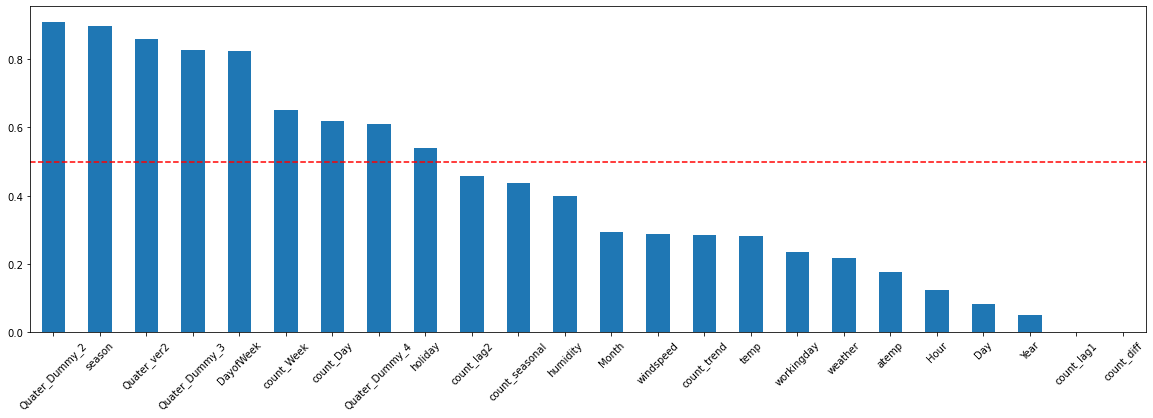

In [87]:
fig_reg1.pvalues.sort_values(ascending = False).plot(kind = 'bar',figsize = (20,6))
plt.axhline(0.5,color = 'r', linestyle = '--')
plt.xticks(rotation = 45)
plt.show()

## 시각화

관계성을 눈으로 확인하는 단계임.<br>
Y와 X의 관계성은 높을수록, X들끼리의 관계성은 낮을 수록 좋음 (이론적) <br>
하지만 현실은 반대

### 히스토그램

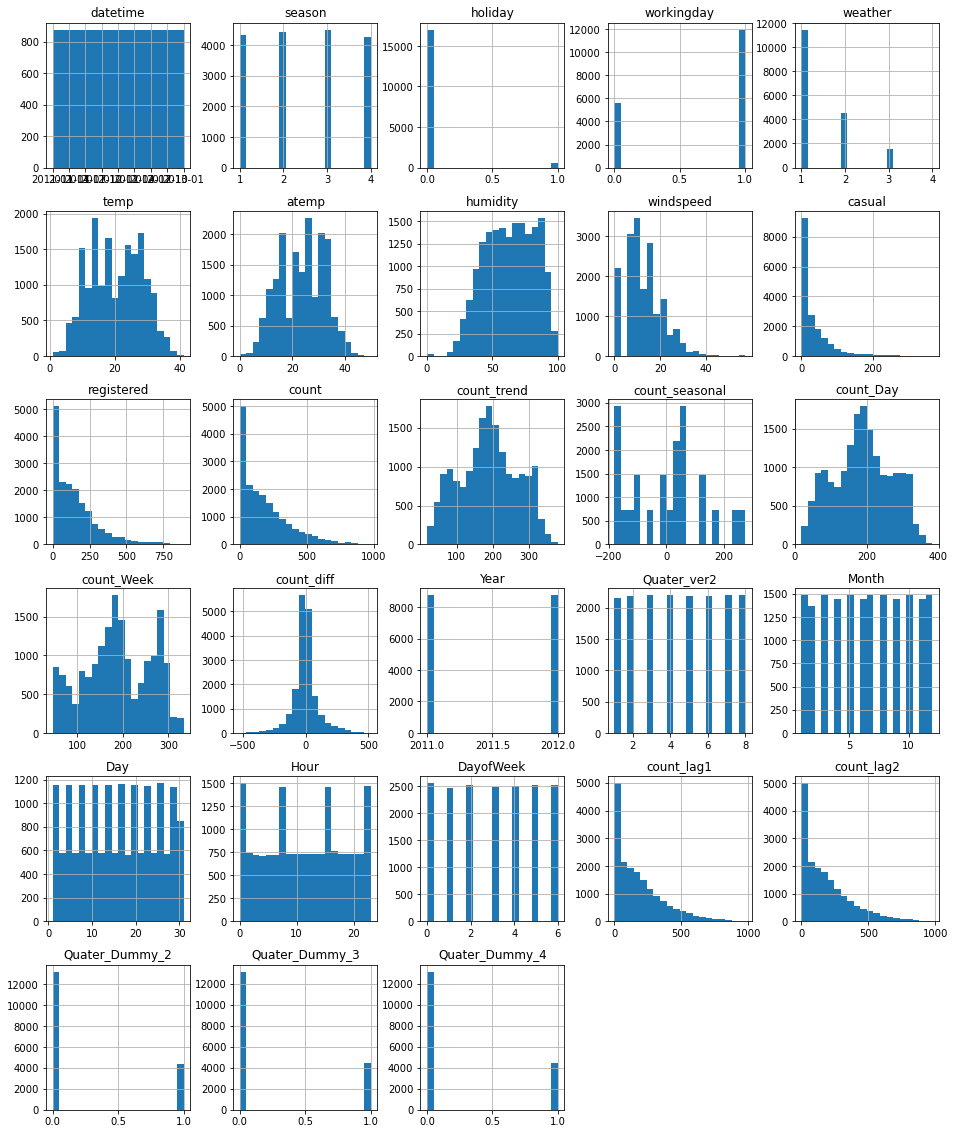

In [93]:
raw_fe.hist(bins = 20, figsize =(16,20), grid = True)
plt.show()

### boxplot

계절별로 count의 분포가 똑같다면? 계절에 의한 count는 별다른 패턴이 없다.별 도움이 안될 수도 있다.<br>
계절마다 패턴이 다르면? 계절 변수가 count에 영향이 있다는 이야기

(0.0, 1000.0)

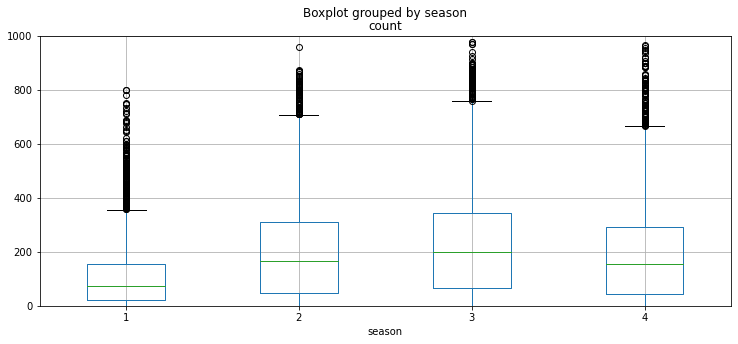

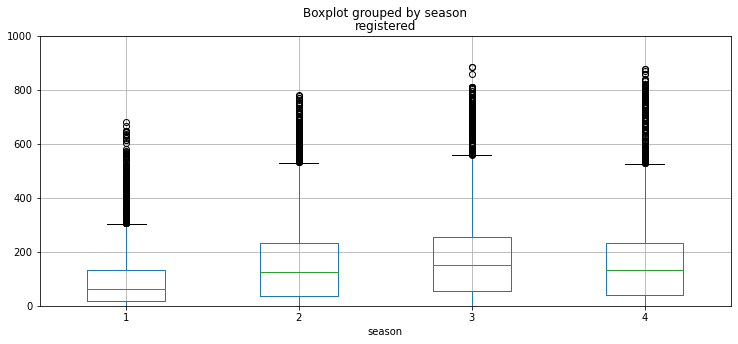

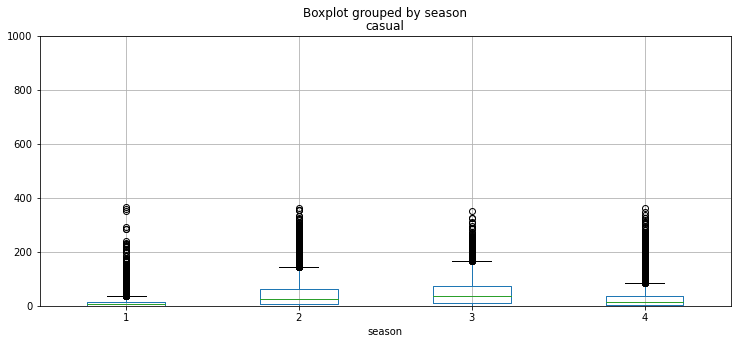

In [95]:
raw_fe.boxplot(column = 'count', by = 'season',grid = True, figsize = (12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column = 'registered', by = 'season', grid = True, figsize = (12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column = 'casual', by = 'season', grid = True, figsize = (12,5))
plt.ylim(0,1000)

Text(0.5, 1.0, '2')

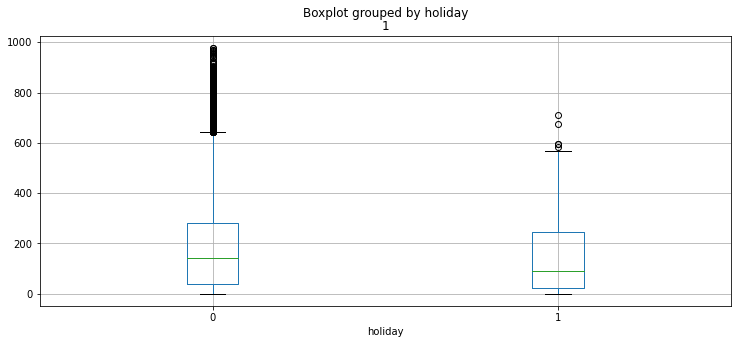

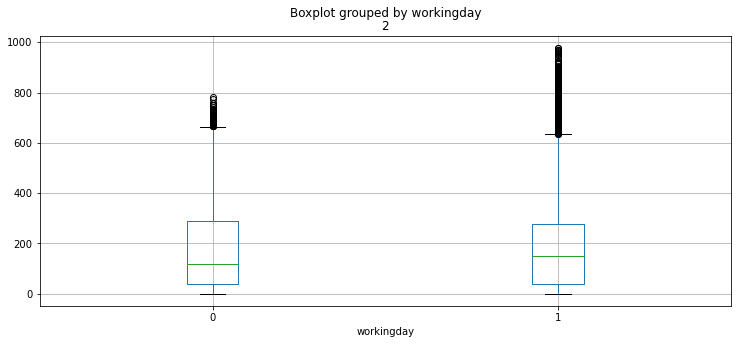

In [100]:
# 별도의 figure 생성
raw_fe.boxplot(column = 'count', by = 'holiday', grid = True, figsize = (12,5))
plt.title(1)

# 별도의 figure 생성
raw_fe.boxplot(column = 'count', by = 'workingday', grid = True, figsize = (12,5))
plt.title(2)

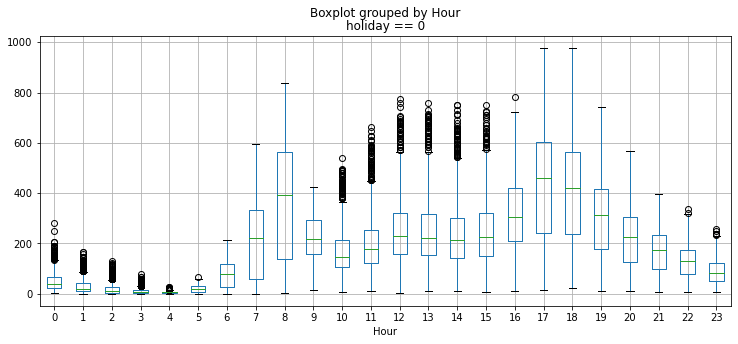

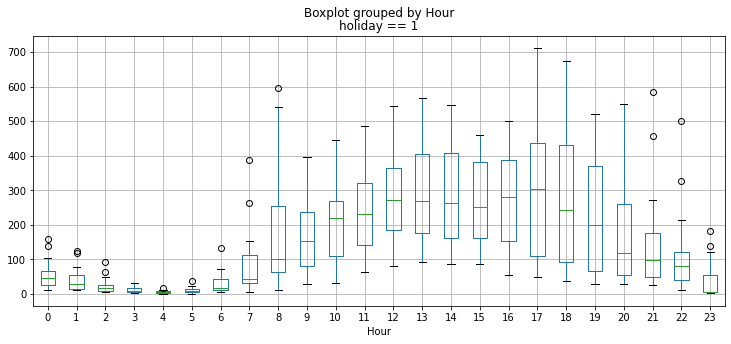

In [103]:
raw_fe[raw_fe.holiday ==0].boxplot(column = 'count', by = 'Hour', grid = True, figsize = (12,5))
plt.title('holiday == 0')
plt.show()

raw_fe[raw_fe.holiday ==1].boxplot(column = 'count', by = 'Hour', grid = True, figsize = (12,5))
plt.title('holiday == 1')
plt.show()


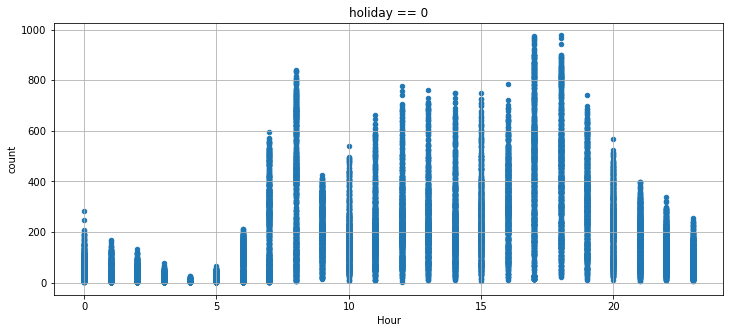

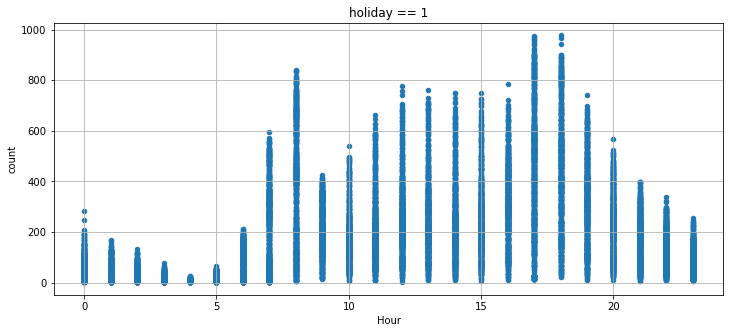

In [105]:
raw_fe[raw_fe.holiday ==0].plot.scatter(y= 'count', x = 'Hour', grid = True, figsize = (12,5))
plt.title('holiday == 0')
plt.show()

raw_fe[raw_fe.holiday ==0].plot.scatter(y = 'count', x = 'Hour', grid = True, figsize = (12,5))
plt.title('holiday == 1')
plt.show()


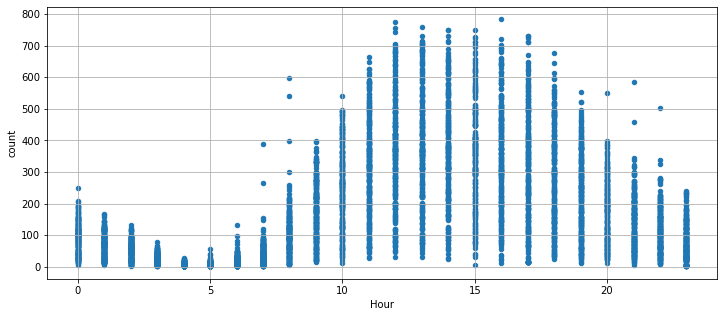

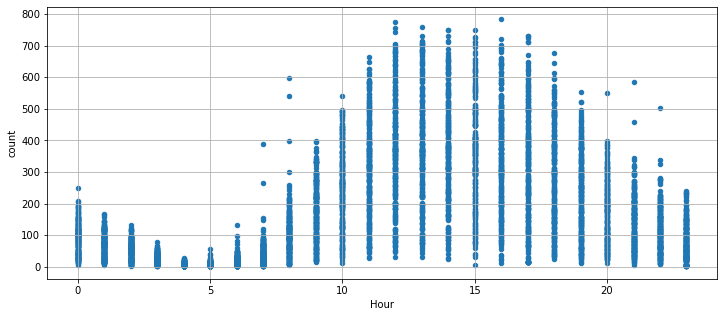

In [106]:
raw_fe[raw_fe.workingday ==0].plot.scatter(y = 'count', x = 'Hour', grid = True, figsize = (12,5))
plt.show()

raw_fe[raw_fe.workingday ==0].plot.scatter(y = 'count', x = 'Hour', grid = True, figsize = (12,5))
plt.show()

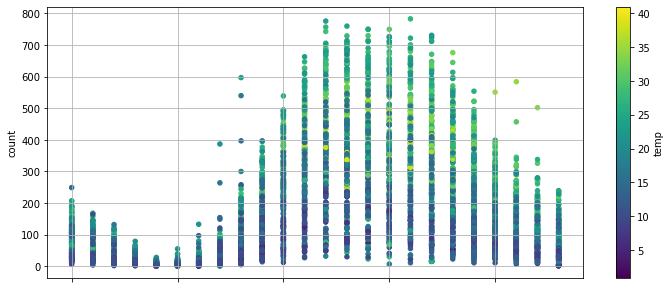

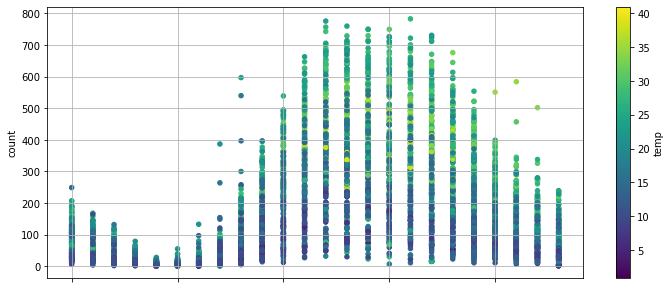

In [113]:
# raw_fe[raw_fe.workingday ==0].plot(kind ='scatter', y= 'count', x= 'Hour',grid = True, figsize = (12,6))
raw_fe[raw_fe.workingday ==0].plot.scatter( y= 'count', x= 'Hour',c = 'temp',grid = True, figsize = (12,5),colormap = 'viridis')
plt.show()

raw_fe[raw_fe.workingday ==0].plot.scatter( y= 'count', x= 'Hour',c = 'temp',grid = True, figsize = (12,5),colormap = 'viridis')
plt.show()

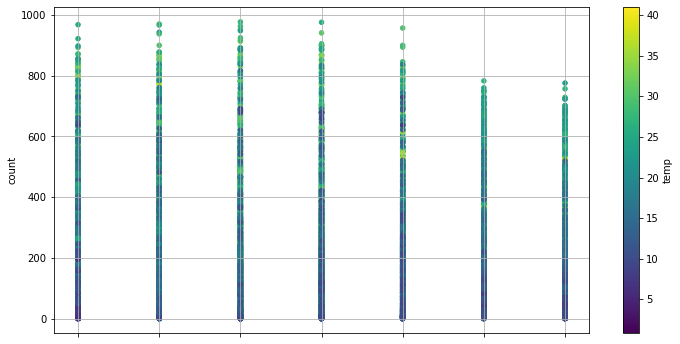

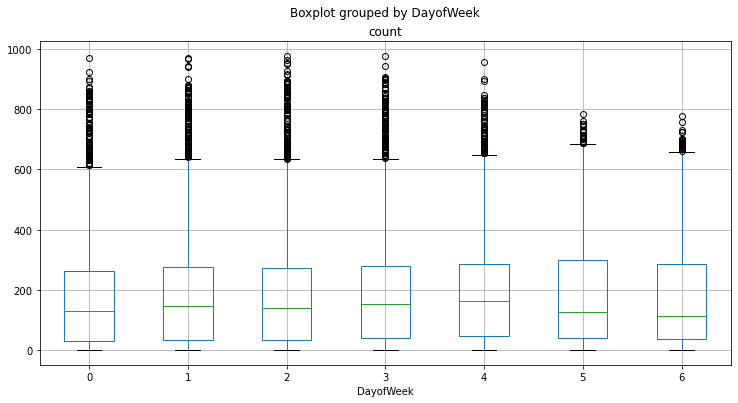

In [114]:
raw_fe.plot.scatter(y = 'count', x= 'DayofWeek', c= 'temp', grid = True, figsize  = (12,6), colormap = 'viridis')
plt.show()

raw_fe.boxplot(column = 'count', by = 'DayofWeek', grid = True, figsize = (12,6))
plt.show()

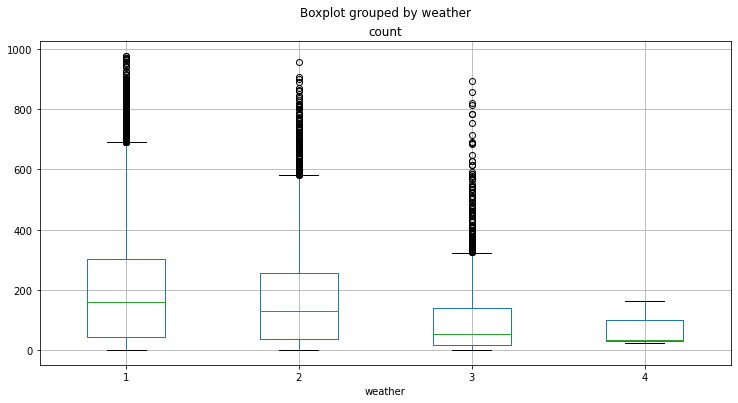

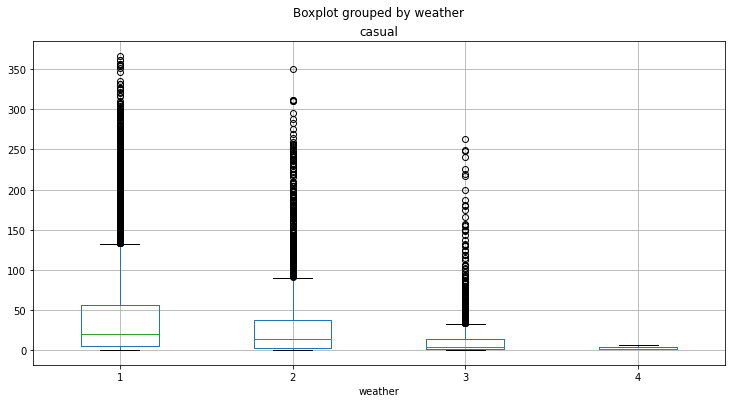

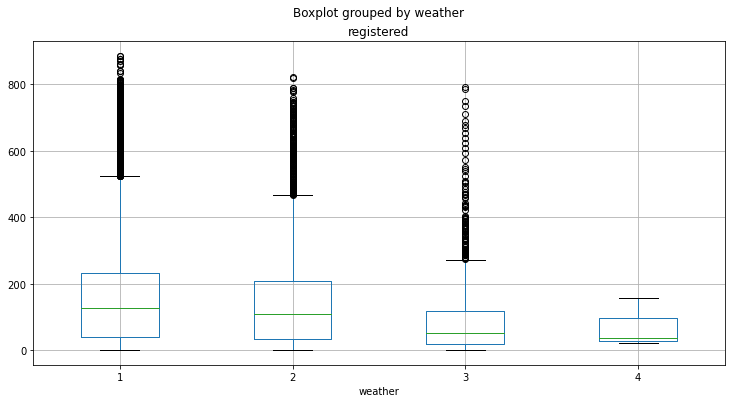

In [115]:
raw_fe.boxplot(column = 'count', by = 'weather', grid = True, figsize = (12,6))
plt.show()
raw_fe.boxplot(column = 'casual', by = 'weather', grid = True, figsize = (12,6))
plt.show()
raw_fe.boxplot(column = 'registered', by = 'weather', grid = True, figsize = (12,6))
plt.show()

In [121]:
pd.concat([raw_fe.dtypes, raw_fe.describe(include='all').T], axis = 1)

,0,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,datetime64[ns],17544,17379,2012-10-29 00:00:00,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
count_lag1,float64,"17,544.00",NaN,NaN,NaN,NaT,NaT,187.79,181.35,1.00,38.00,140.00,279.00,977.00
count_lag2,float64,"17,544.00",NaN,NaN,NaN,NaT,NaT,187.79,181.35,1.00,38.00,140.00,279.00,977.00
Quater_Dummy_2,uint8,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,0.00,1.00
Quater_Dummy_3,uint8,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,1.00,1.00


In [122]:
raw_fe.weather.value_counts()

1    11455
2     4563
3     1523
4        3
Name: weather, dtype: int64

In [123]:
pd.DataFrame(raw_fe['weather'].value_counts() / raw_fe['weather'].value_counts().sum() * 100).T

,1,2,3,4
weather,65.29,26.01,8.68,0.02


In [124]:
pd.crosstab(index = raw_fe['count'], columns = raw_fe['weather'], margins = True)

weather,1,2,3,4,All
count,,,,,
1,100,45,27,0,172
2,136,59,37,0,232
3,136,66,41,0,243
4,149,62,36,0,247
5,164,63,36,0,263
...,...,...,...,...,...
968,1,0,0,0,1
970,1,0,0,0,1
976,1,0,0,0,1


In [126]:
sub_table = pd.crosstab(index = raw_fe['count'], columns = raw_fe['weather'], margins = True)
sub_table / sub_table.loc['All'] * 100

weather,1,2,3,4,All
count,,,,,
1,0.87,0.99,1.77,0.00,0.98
2,1.19,1.29,2.43,0.00,1.32
3,1.19,1.45,2.69,0.00,1.39
4,1.30,1.36,2.36,0.00,1.41
5,1.43,1.38,2.36,0.00,1.50
...,...,...,...,...,...
968,0.01,0.00,0.00,0.00,0.01
970,0.01,0.00,0.00,0.00,0.01
976,0.01,0.00,0.00,0.00,0.01


In [129]:
raw_fe.groupby('weather').describe().T

weather                      1        2        3    4
season         count 11,455.00 4,563.00 1,523.00 3.00
               mean       2.51     2.49     2.45 1.00
               std        1.09     1.15     1.16 0.00
               min        1.00     1.00     1.00 1.00
               25%        2.00     1.00     1.00 1.00
...                        ...      ...      ...  ...
Quater_Dummy_4 min        0.00     0.00     0.00 0.00
               25%        0.00     0.00     0.00 0.00
               50%        0.00     0.00     0.00 0.00
               75%        0.00     1.00     1.00 0.00
               max        1.00     1.00     1.00 0.00

[208 rows x 4 columns]

In [130]:
raw_fe.groupby(['weather', 'DayofWeek']).count()
raw_fe.groupby(['weather', 'DayofWeek']).mean()

season  holiday  workingday  temp  atemp  humidity  \
weather DayofWeek                                                       
1       0            2.45     0.14        0.86 20.70  24.23     59.05   
        1            2.48     0.00        1.00 21.36  24.89     57.11   
        2            2.50     0.01        0.99 21.61  25.08     58.23   
        3            2.53     0.03        0.97 21.35  24.88     55.85   
        4            2.56     0.03        0.97 20.71  24.00     57.06   
...                   ...      ...         ...   ...    ...       ...   
3       5            2.31     0.00        0.00 17.50  20.48     86.43   
        6            2.62     0.00        0.00 19.17  22.40     81.39   
4       0            1.00     0.00        1.00  8.20  11.37     86.00   
        2            1.00     0.00        1.00  9.02   9.85     93.00   
        5            1.00     0.00        0.00  5.74   6.82     86.00   

                   windspeed  casual  registered  count  ...     Year  \
weather DayofWeek                                        ...            
1       0              12.86   30.40      160.04 190.43  ... 2,011.49   
        1              12.95   27.57      186.58 214.14  ... 2,011.51   
        2              12.22   26.65      181.52 208.17  ... 2,011.53   
        3              13.01   28.95      184.81 213.77  ... 2,011.54   
        4              12.73   33.50      168.64 202.14  ... 2,011.49   
...                      ...     ...         ...    ...  ...      ...   
3       5              18.08   26.43       70.57  97.00  ... 2,011.46   
        6              16.12   31.76       84.02 115.78  ... 2,011.58   
4       0               6.00    6.00      158.00 164.00  ... 2,012.00   
        2              22.00    1.00       35.00  36.00  ... 2,011.00   
        5              13.00    1.00       22.00  23.00  ... 2,012.00   

                   Quater_ver2  Month   Day  Hour  count_lag1  count_lag2  \
weather DayofWeek                                                           
1       0                 4.42   6.36 15.64 11.39      188.77      188.68   
        1                 4.48   6.22 16.16 12.17      213.34      213.59   
        2                 4.59   6.41 15.86 11.60      207.08      209.14   
        3                 4.64   6.51 15.01 11.90      213.36      214.26   
        4                 4.52   6.71 15.41 11.57      203.38      204.10   
...                        ...    ...   ...   ...         ...         ...   
3       5                 4.15   5.71 16.32 12.18      109.89      120.54   
        6                 4.87   6.46 14.36 13.77      143.89      166.62   
4       0                 5.00   1.00  9.00 18.00      152.00       49.00   
        2                 1.00   1.00 26.00 16.00       43.00       36.00   
        5                 5.00   1.00 21.00  1.00       24.00       38.00   

                   Quater_Dummy_2  Quater_Dummy_3  Quater_Dummy_4  
weather DayofWeek                                                  
1       0                    0.25            0.27            0.22  
        1                    0.24            0.30            0.20  
        2                    0.27            0.30            0.20  
        3                    0.28            0.28            0.22  
        4                    0.28            0.25            0.26  
...                           ...             ...             ...  
3       5                    0.21            0.30            0.17  
        6                    0.25            0.28            0.25  
4       0                    0.00            0.00            0.00  
        2                    0.00            0.00            0.00  
        5                    0.00            0.00            0.00  

[24 rows x 25 columns]

In [131]:
raw_fe.groupby(['weather', 'DayofWeek']).agg({'count' : [sum,min,max]})

count          
                      sum  min  max
weather DayofWeek                  
1       0          303551    1  968
        1          326993    1  970
        2          328285    1  977
        3          354852    1  976
        4          333333    1  900
...                   ...  ...  ...
3       5           19498    1  584
        6           19683    1  626
4       0             164  164  164
        2              36   36   36
        5              23   23   23

[24 rows x 3 columns]

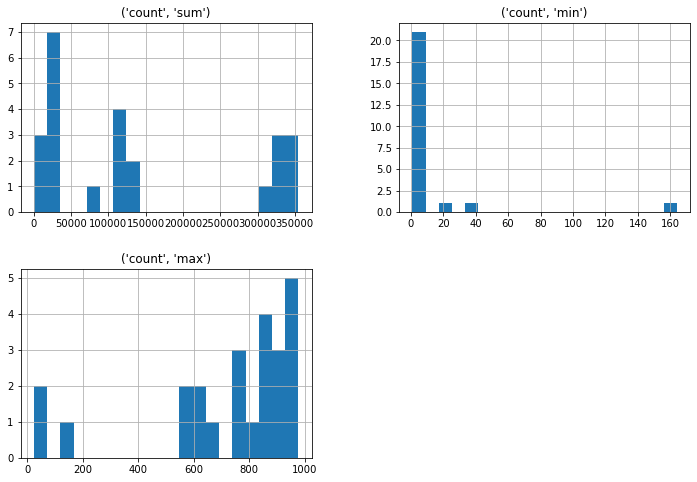

In [132]:
# groupby & histogram
raw_fe.groupby(['weather', 'DayofWeek']).agg({'count' : [sum,min,max]}).hist(bins = 20, figsize = (12,8))
plt.show()

In [133]:
raw_fe.groupby('weather').groups.items()

dict_items([(1, DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 06:00:00',
               '2011-01-01 07:00:00', '2011-01-01 08:00:00',
               '2011-01-01 09:00:00', '2011-01-01 10:00:00',
               ...
               '2012-12-31 02:00:00', '2012-12-31 03:00:00',
               '2012-12-31 04:00:00', '2012-12-31 05:00:00',
               '2012-12-31 06:00:00', '2012-12-31 07:00:00',
               '2012-12-31 08:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=11455, freq=None)), (2, DatetimeIndex(['2011-01-01 05:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-

In [134]:
for key, item in raw_fe.groupby('weather').groups.items():
    display(key, item)
    display(raw_fe.groupby('weather').get_group(key).head())

1

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 06:00:00',
               '2011-01-01 07:00:00', '2011-01-01 08:00:00',
               '2011-01-01 09:00:00', '2011-01-01 10:00:00',
               ...
               '2012-12-31 02:00:00', '2012-12-31 03:00:00',
               '2012-12-31 04:00:00', '2012-12-31 05:00:00',
               '2012-12-31 06:00:00', '2012-12-31 07:00:00',
               '2012-12-31 08:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=11455, freq=None)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0


2

DatetimeIndex(['2011-01-01 05:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00',
               ...
               '2012-12-31 11:00:00', '2012-12-31 12:00:00',
               '2012-12-31 13:00:00', '2012-12-31 14:00:00',
               '2012-12-31 15:00:00', '2012-12-31 16:00:00',
               '2012-12-31 17:00:00', '2012-12-31 18:00:00',
               '2012-12-31 19:00:00', '2012-12-31 20:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=4563, freq=None)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.00,0,...,1,1,1,5,5,1.00,13.00,0,0,0
2011-01-01 13:00:00,2011-01-01 13:00:00,1,0,0,2,18.86,22.73,72,20.00,47,...,1,1,1,13,5,84.00,56.00,0,0,0
2011-01-01 14:00:00,2011-01-01 14:00:00,1,0,0,2,18.86,22.73,72,19.00,35,...,1,1,1,14,5,94.00,84.00,0,0,0
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,20.00,40,...,1,1,1,15,5,106.00,94.00,0,0,0
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.21,82,20.00,41,...,1,1,1,16,5,110.00,106.00,0,0,0


3

DatetimeIndex(['2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-02 06:00:00', '2011-01-02 08:00:00',
               '2011-01-02 14:00:00', '2011-01-02 15:00:00',
               '2011-01-02 16:00:00', '2011-01-07 05:00:00',
               '2011-01-08 03:00:00', '2011-01-08 04:00:00',
               ...
               '2012-12-26 19:00:00', '2012-12-26 20:00:00',
               '2012-12-26 22:00:00', '2012-12-26 23:00:00',
               '2012-12-27 00:00:00', '2012-12-27 01:00:00',
               '2012-12-29 10:00:00', '2012-12-29 11:00:00',
               '2012-12-29 12:00:00', '2012-12-29 13:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=1523, freq=None)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,2011-01-01 18:00:00,1,0,0,3,17.22,21.21,88,17.00,9,...,1,1,1,18,5,67.00,93.00,0,0,0
2011-01-01 19:00:00,2011-01-01 19:00:00,1,0,0,3,17.22,21.21,88,17.00,6,...,1,1,1,19,5,35.00,67.00,0,0,0
2011-01-02 06:00:00,2011-01-02 06:00:00,1,0,0,3,17.22,21.21,77,20.00,0,...,1,1,2,6,6,3.00,3.00,0,0,0
2011-01-02 08:00:00,2011-01-02 08:00:00,1,0,0,3,16.40,20.45,71,15.00,0,...,1,1,2,8,6,1.00,2.00,0,0,0
2011-01-02 14:00:00,2011-01-02 14:00:00,1,0,0,3,14.76,17.43,76,13.00,4,...,1,1,2,14,6,75.00,93.00,0,0,0


4

DatetimeIndex(['2011-01-26 16:00:00', '2012-01-09 18:00:00',
               '2012-01-21 01:00:00'],
              dtype='datetime64[ns]', name='DateTime', freq=None)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.00,1,...,1,1,26,16,2,43.00,36.00,0,0,0
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.20,11.37,86,6.00,6,...,5,1,9,18,0,152.00,49.00,0,0,0
2012-01-21 01:00:00,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,13.00,1,...,5,1,21,1,5,24.00,38.00,0,0,0


In [135]:
# 구간 나누기
pd.cut(raw_fe['temp'],10)

DateTime
2011-01-01 00:00:00    (8.856, 12.874]
2011-01-01 01:00:00    (8.856, 12.874]
2011-01-01 02:00:00    (8.856, 12.874]
2011-01-01 03:00:00    (8.856, 12.874]
2011-01-01 04:00:00    (8.856, 12.874]
                            ...       
2012-12-31 19:00:00    (8.856, 12.874]
2012-12-31 20:00:00    (8.856, 12.874]
2012-12-31 21:00:00    (8.856, 12.874]
2012-12-31 22:00:00    (8.856, 12.874]
2012-12-31 23:00:00    (8.856, 12.874]
Freq: H, Name: temp, Length: 17544, dtype: category
Categories (10, interval[float64, right]): [(0.78, 4.838] < (4.838, 8.856] < (8.856, 12.874] < (12.874, 16.892] ... (24.928, 28.946] < (28.946, 32.964] < (32.964, 36.982] < (36.982, 41.0]]

In [137]:
pd.cut(raw_fe['temp'],10).value_counts().sort_index()

(0.78, 4.838]        124
(4.838, 8.856]      1018
(8.856, 12.874]     2466
(12.874, 16.892]    2926
(16.892, 20.91]     2474
(20.91, 24.928]     2687
(24.928, 28.946]    3164
(28.946, 32.964]    1976
(32.964, 36.982]     625
(36.982, 41.0]        84
Name: temp, dtype: int64

In [143]:
# groupby & pd.cut
raw_fe.groupby(pd.cut(raw_fe['temp'],10)).describe().T

temp                  (0.78, 4.838]  (4.838, 8.856]  (8.856, 12.874]  \
season         count         124.00        1,018.00         2,466.00   
               mean            1.00            1.22             2.02   
               std             0.00            0.75             1.36   
               min             1.00            1.00             1.00   
               25%             1.00            1.00             1.00   
...                             ...             ...              ...   
Quater_Dummy_4 min             0.00            0.00             0.00   
               25%             0.00            0.00             0.00   
               50%             0.00            0.00             0.00   
               75%             0.00            0.00             1.00   
               max             0.00            1.00             1.00   

temp                  (12.874, 16.892]  (16.892, 20.91]  (20.91, 24.928]  \
season         count          2,926.00         2,474.00         2,687.00   
               mean               2.51             2.66             2.71   
               std                1.36             1.21             0.96   
               min                1.00             1.00             1.00   
               25%                1.00             2.00             2.00   
...                                ...              ...              ...   
Quater_Dummy_4 min                0.00             0.00             0.00   
               25%                0.00             0.00             0.00   
               50%                0.00             0.00             0.00   
               75%                1.00             1.00             0.00   
               max                1.00             1.00             1.00   

temp                  (24.928, 28.946]  (28.946, 32.964]  (32.964, 36.982]  \
season         count          3,164.00          1,976.00            625.00   
               mean               2.73              2.80              2.86   
               std                0.65              0.44              0.35   
               min                1.00              1.00              2.00   
               25%                2.00              3.00              3.00   
...                                ...               ...               ...   
Quater_Dummy_4 min                0.00              0.00              0.00   
               25%                0.00              0.00              0.00   
               50%                0.00              0.00              0.00   
               75%                0.00              0.00              0.00   
               max                1.00              1.00              0.00   

temp                  (36.982, 41.0]  
season         count           84.00  
               mean             2.90  
               std              0.30  
               min              2.00  
               25%              3.00  
...                              ...  
Quater_Dummy_4 min              0.00  
               25%              0.00  
               50%              0.00  
               75%              0.00  
               max              0.00  

[216 rows x 10 columns]

In [144]:
raw_fe.groupby(pd.cut(raw_fe['temp'],10)).describe().T.loc['season']

temp,"(0.78, 4.838]","(4.838, 8.856]","(8.856, 12.874]","(12.874, 16.892]","(16.892, 20.91]","(20.91, 24.928]","(24.928, 28.946]","(28.946, 32.964]","(32.964, 36.982]","(36.982, 41.0]"
count,124.00,"1,018.00","2,466.00","2,926.00","2,474.00","2,687.00","3,164.00","1,976.00",625.00,84.00
mean,1.00,1.22,2.02,2.51,2.66,2.71,2.73,2.80,2.86,2.90
std,0.00,0.75,1.36,1.36,1.21,0.96,0.65,0.44,0.35,0.30
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00
25%,1.00,1.00,1.00,1.00,2.00,2.00,2.00,3.00,3.00,3.00
50%,1.00,1.00,1.00,2.00,2.00,2.00,3.00,3.00,3.00,3.00
75%,1.00,1.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00
max,1.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00


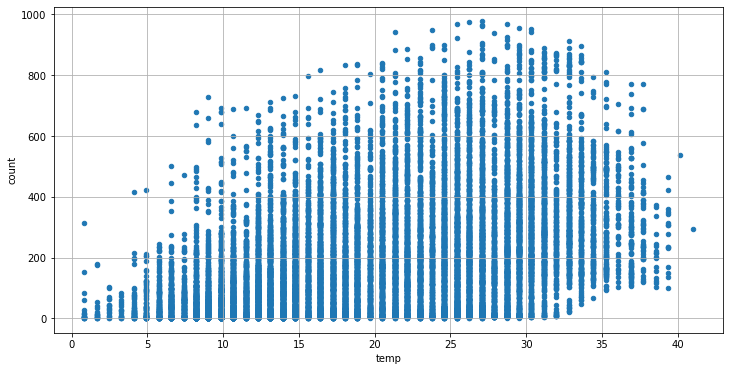

In [145]:
# scatter plot example
raw_fe.plot.scatter(y= 'count', x= 'temp',grid = True, figsize = (12,6))
plt.show()

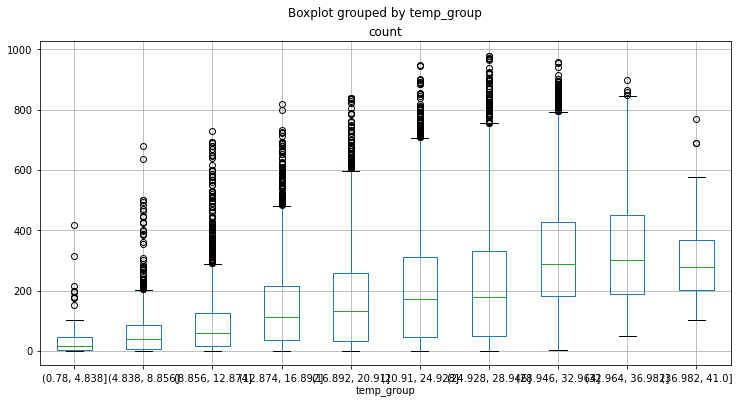

In [147]:
raw_fe.boxplot(column = 'count', by ='temp_group',grid = True, figsize = (12,6))
plt.show()

<AxesSubplot:title={'center':'count'}, xlabel='temp'>

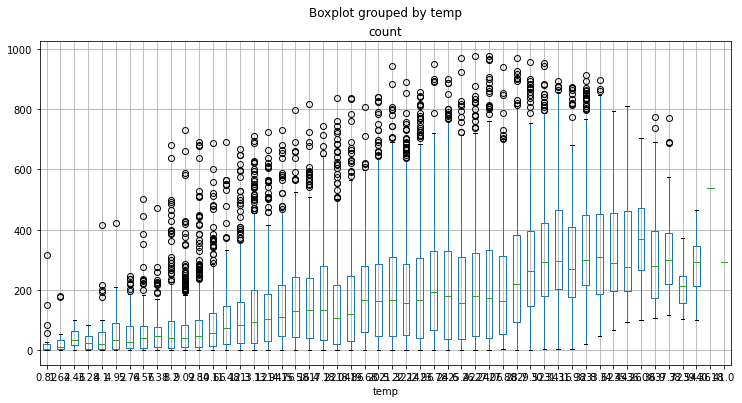

In [148]:
raw_fe.boxplot(column = 'count', by ='temp',grid = True, figsize = (12,6))

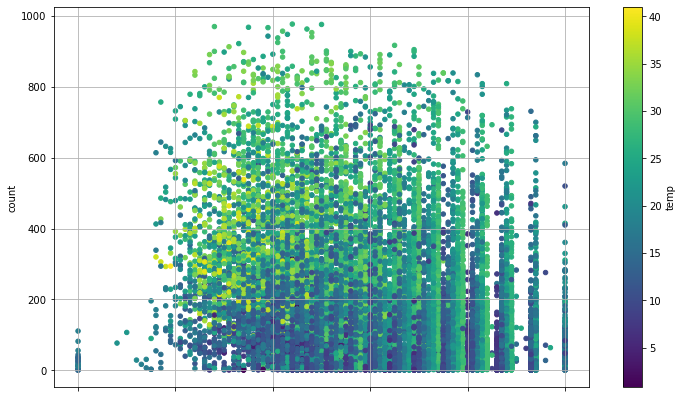

In [151]:
raw_fe.plot.scatter(y= 'count',x = 'humidity',c = 'temp' ,grid = True,figsize = (12,7),colormap = 'viridis')
plt.show()

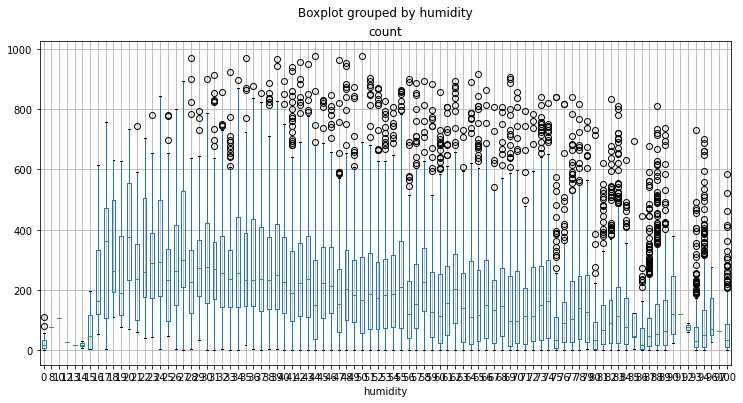

In [153]:
raw_fe.boxplot(column = 'count', by ='humidity',grid = True, figsize = (12,6))
plt.show()

<AxesSubplot:title={'center':'count'}, xlabel='windspeed'>

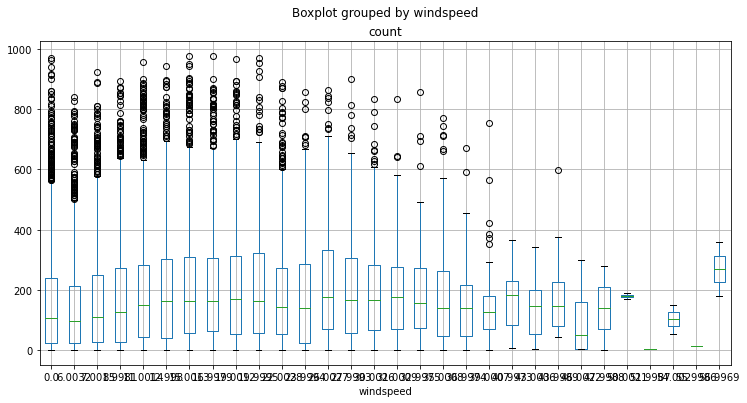

In [154]:
raw_fe.boxplot(column = 'count', by ='windspeed',grid = True, figsize = (12,6))

<AxesSubplot:title={'center':'count'}, xlabel='Year'>

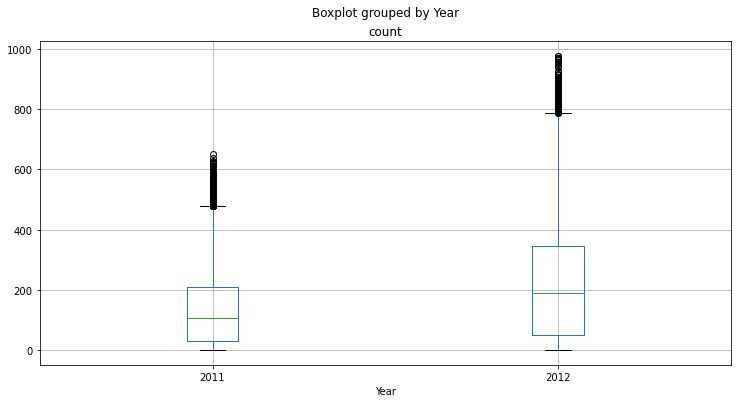

In [156]:
raw_fe.boxplot(column = 'count', by ='Year',grid = True, figsize = (12,6))

<AxesSubplot:title={'center':'count'}, xlabel='Month'>

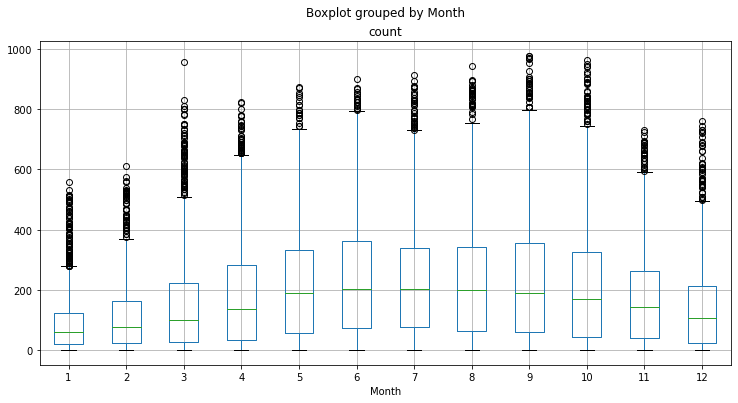

In [157]:
raw_fe.boxplot(column = 'count', by ='Month',grid = True, figsize = (12,6))

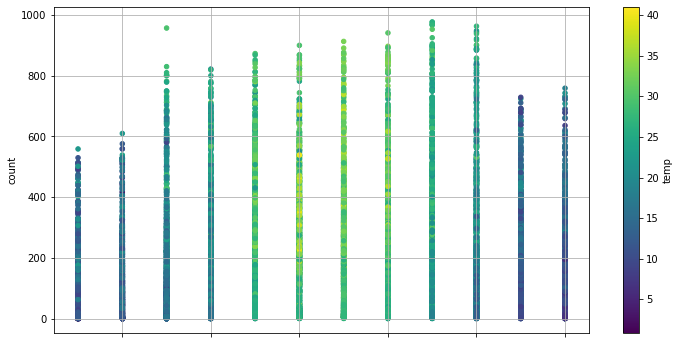

In [159]:
raw_fe.plot.scatter(y= 'count', x='Month',c='temp',grid = True, figsize = (12,6),colormap ='viridis')
plt.show()

각 변수별 상관관계를 그려주는 그래프. 선으로 될수록 1

In [ ]:
pd.plotting.scatter_matrix(raw_fe,figsize = (18,18), diagnoal = 'kde')
plt.show()